In [1]:
import os
import sys
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import patches
from bs4 import BeautifulSoup as bs
from IPython.display import display, HTML
from main import main  
import warnings
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = "1"
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
### English

In [4]:
sys.argv = [
        "notebook.ipynb",
        '--image_path', './examples/English_Table/PMC514528_004_00.png',
        '--gpu',
]
pred_html, pred_bbox, pred_code = main()
soup = bs(pred_code)
table_code = soup.prettify()
display(HTML(table_code))

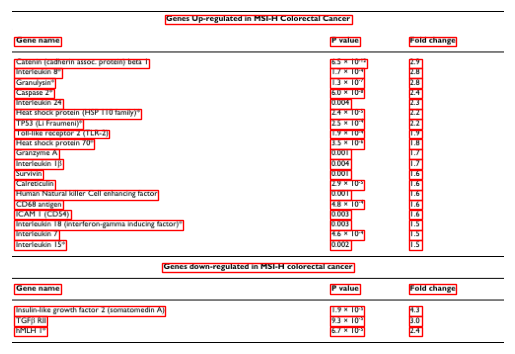

In [5]:
image = Image.open(sys.argv[2]).convert("RGB")
fig, ax = plt.subplots()
for i in pred_bbox:
    rect = patches.Rectangle(i[:2], i[2] - i[0], i[3] - i[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
ax.set_axis_off()
ax.imshow(image)
plt.show()

### Korean (EasyOCR 사용)

In [6]:
sys.argv = [
        "notebook.ipynb",
        '--image_path', './examples/Korean_Table/koen_simple1.jpg',
        '--gpu',
        '--korean',
        '--ocr',"1",
]
pred_html, pred_bbox, pred_code = main()

soup = bs(pred_code)
table_code = soup.prettify()
display(HTML(table_code))

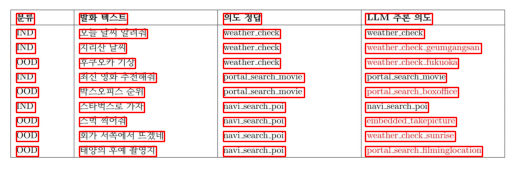

In [7]:
image = Image.open(sys.argv[2]).convert("RGB")
fig, ax = plt.subplots()
for i in pred_bbox:
    rect = patches.Rectangle(i[:2], i[2] - i[0], i[3] - i[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
ax.set_axis_off()
ax.imshow(image)
plt.show()